In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Face Emotion Recognition Dataset.zip" -d "/content/"


Streaming output truncated to the last 5000 lines.
  inflating: /content/images/validation/fear/8797.jpg  
  inflating: /content/images/validation/fear/8818.jpg  
  inflating: /content/images/validation/fear/886.jpg  
  inflating: /content/images/validation/fear/9037.jpg  
  inflating: /content/images/validation/fear/9040.jpg  
  inflating: /content/images/validation/fear/9101.jpg  
  inflating: /content/images/validation/fear/911.jpg  
  inflating: /content/images/validation/fear/9179.jpg  
  inflating: /content/images/validation/fear/9205.jpg  
  inflating: /content/images/validation/fear/9232.jpg  
  inflating: /content/images/validation/fear/9251.jpg  
  inflating: /content/images/validation/fear/9261.jpg  
  inflating: /content/images/validation/fear/9281.jpg  
  inflating: /content/images/validation/fear/9302.jpg  
  inflating: /content/images/validation/fear/9333.jpg  
  inflating: /content/images/validation/fear/9369.jpg  
  inflating: /content/images/validation/fear/9370.jpg  

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [ ]:
!ls "/content/"


drive  images  sample_data


Dataset Classification

In [ ]:
!ls "/content/images"


images	train  validation


In [ ]:
IMG_SIZE = (48, 48)
BATCH_SIZE = 32

train_dir = "/content/images/train"
val_dir = "/content/images/validation"

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int'
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int'
)


Found 28821 files belonging to 7 classes.
Found 7066 files belonging to 7 classes.



Images usually have pixel values from 0 to 255.

Dividing by 255.0 scales them to 0–1, which:

Helps the model converge faster

Reduces the chance of gradient issues (like vanishing or exploding gradients)

Makes training more stable

Randomize training data (avoid overfitting)

Speed up pipeline (reduce wait time for GPU)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.map(lambda x, y: (x / 255.0, y)).shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.map(lambda x, y: (x / 255.0, y)).prefetch(buffer_size=AUTOTUNE)


In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(48, 48, 3)),  # <-- this replaces input_shape in Conv2D
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(7, activation='softmax')
])


This code builds a Convolutional Neural Network (CNN) using TensorFlow’s Keras API to classify facial images into one of 7 emotions. It starts with an input layer for 48x48 RGB images, followed by three convolutional layers with increasing filters (32, 64, 128) to extract features. Each convolution is followed by max pooling to reduce spatial size. The extracted features are flattened and passed through a dense layer with 128 neurons and a dropout layer (30%) to prevent overfitting. Finally, a softmax output layer with 7 units gives the predicted emotion class probabilities.









In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # because label_mode='int'
    metrics=['accuracy']
)


Training

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50
)


Epoch 1/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7583 - loss: 0.6367 - val_accuracy: 0.5584 - val_loss: 1.4403
Epoch 2/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7698 - loss: 0.5993 - val_accuracy: 0.5487 - val_loss: 1.5002
Epoch 3/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7760 - loss: 0.5772 - val_accuracy: 0.5651 - val_loss: 1.6198
Epoch 4/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7827 - loss: 0.5497 - val_accuracy: 0.5586 - val_loss: 1.6723
Epoch 5/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7896 - loss: 0.5422 - val_accuracy: 0.5542 - val_loss: 1.6766
Epoch 6/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8038 - loss: 0.5040 - val_accuracy: 0.5613 - val_loss: 1.7353
Epoch 7/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8173 - loss: 0.4783 - val_accuracy: 0.5620 - val_loss: 1.8505
Epoch 8/50
901/901 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8176 - loss: 0.4674 - val_accuracy: 0.

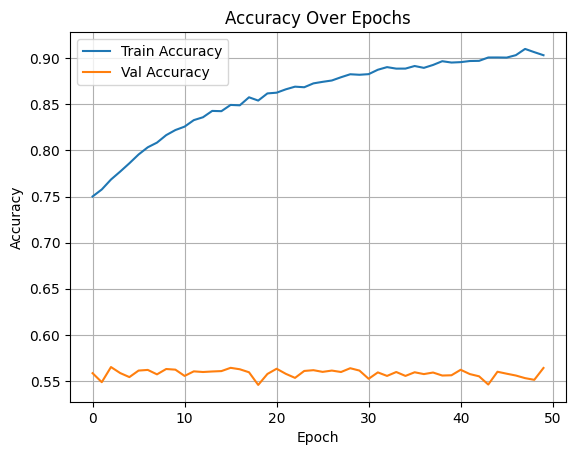

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


When training accuracy is higher than validation accuracy, it often indicates overfitting, where the model performs well on training data but struggles to generalize to new data. This can be caused by a complex model, insufficient regularization, or a small/noisy dataset. To address this, you can:

Add regularization (e.g., dropout, L2 regularization)

Use data augmentation to diversify training data

Implement early stopping to halt training when validation performance stops improving

Simplify the model by reducing its complexity

In [ ]:
val_loss, val_acc = model.evaluate(val_ds)
print(f"Validation Accuracy: {val_acc*100:.2f}%")


221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5597 - loss: 3.5404
Validation Accuracy: 56.41%


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving 508.jpg to 508.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step
Predicted emotion: happy


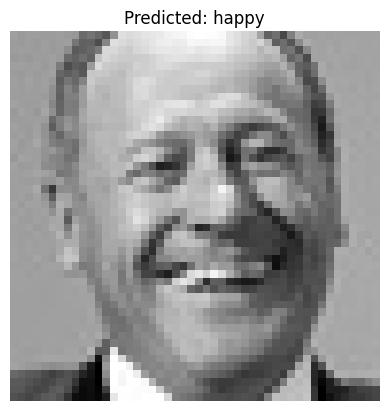

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load and resize image
img = image.load_img("82.jpg", target_size=(48, 48))
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # normalize
img_array = np.expand_dims(img_array, axis=0)  # make batch of 1

# Predict
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)

# Emotion labels
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
print("Predicted emotion:", emotion_labels[predicted_class])

# Optional: display image
plt.imshow(img)
plt.title(f"Predicted: {emotion_labels[predicted_class]}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted emotion: surprise


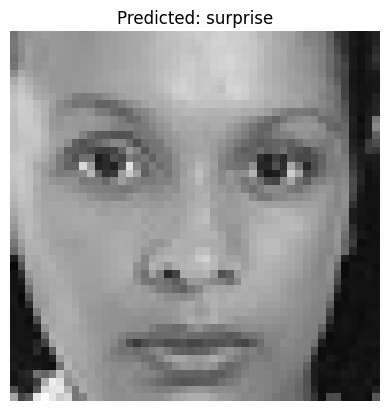

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load and resize image
img = image.load_img("508.jpg", target_size=(48, 48))
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # normalize
img_array = np.expand_dims(img_array, axis=0)  # make batch of 1

# Predict
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)

# Emotion labels
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
print("Predicted emotion:", emotion_labels[predicted_class])

# Optional: display image
plt.imshow(img)
plt.title(f"Predicted: {emotion_labels[predicted_class]}")
plt.axis('off')
plt.show()


Training accuracy goes from ~75% → 91% (awesome)

Validation accuracy is stuck around ~56% and flat across all 50 epochs

Conclusion: The  model is overfitting
It’s learning the training data really well, but it's not generalizing to unseen (validation) data.

In [ ]:
#TO fix This

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


In [ ]:
Data Augumentation

In [ ]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])


In [ ]:
#Building the CNN model Again

In [ ]:
model = models.Sequential([
    layers.Input(shape=(48, 48, 3)),
    data_augmentation,
    layers.Rescaling(1./255),

    layers.Conv2D(32, 3, activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),  # helps reduce overfitting
    layers.Dense(7, activation='softmax')  # 7 emotion classes
])


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=[early_stop]
)


Epoch 1/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.2309 - loss: 1.9898 - val_accuracy: 0.2434 - val_loss: 1.8350
Epoch 2/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.3283 - loss: 1.6767 - val_accuracy: 0.3292 - val_loss: 1.6971
Epoch 3/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.3663 - loss: 1.5983 - val_accuracy: 0.2917 - val_loss: 1.7163
Epoch 4/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.3980 - loss: 1.5464 - val_accuracy: 0.3269 - val_loss: 1.6903
Epoch 5/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.4124 - loss: 1.5131 - val_accuracy: 0.4224 - val_loss: 1.4891
Epoch 6/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.4221 - loss: 1.4755 - val_accuracy: 0.3457 - val_loss: 1.7088
Epoch 7/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.4323 - loss: 1.4563 - val_accuracy: 0.3767 - val_loss: 1.6239
Epoch 8/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.4383 - loss: 1.4506 - 

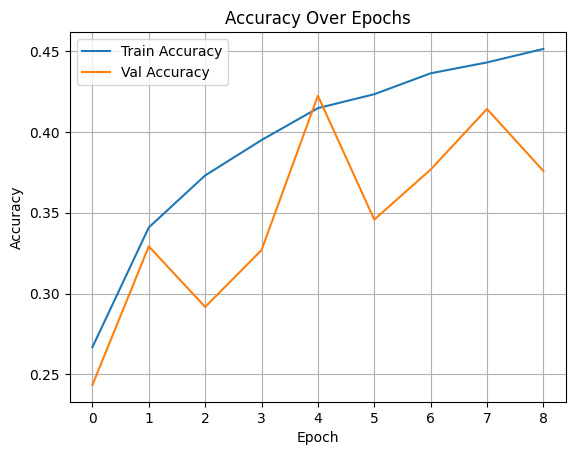

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


What the Graph Shows
Train Accuracy: Steadily improving from ~26% → 45%

Validation Accuracy: Starts low (~24%), jumps up and fluctuates, peaks around ~42% — which is decent for a first few epochs

And EarlyStopping kicked in after 8 epochs because it saw no consistent improvement in validation performance. That's a good sign — it’s helping you avoid wasting time and overfitting

In [ ]:
#Load a Test Image

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving 414.jpg to 414.jpg


In [ ]:
img_path = "/content/414.jpg" # this is fear image


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
Predicted Emotion: fear
Confidence: 30.24%


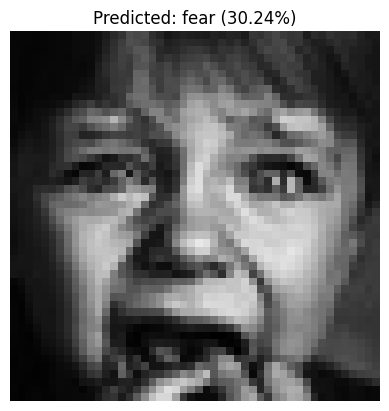

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf

# Load and preprocess the image
img = image.load_img(img_path, target_size=(48, 48))
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

# Predict
pred = model.predict(img_array)
predicted_class = np.argmax(pred[0])
confidence = np.max(pred[0])

# Class labels (adjust if needed)
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Output
print("Predicted Emotion:", class_names[predicted_class])
print("Confidence: {:.2f}%".format(confidence * 100))

# Show image
plt.imshow(img)
plt.title(f"Predicted: {class_names[predicted_class]} ({confidence*100:.2f}%)")
plt.axis('off')
plt.show()



In [ ]:
#let predict another image

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 2412.jpg to 2412.jpg


In [ ]:
img_path = "/content/1911.jpg" # this is Surprice image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Emotion: surprise
Confidence: 67.34%


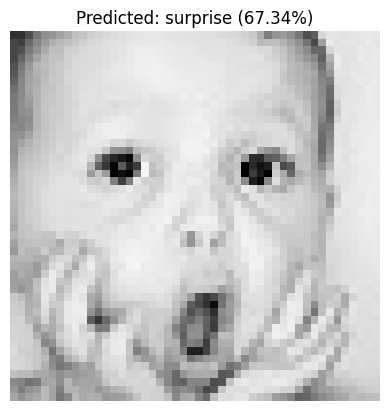

In [ ]:

# Load and preprocess the image
img = image.load_img(img_path, target_size=(48, 48))
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

# Predict
pred = model.predict(img_array)
predicted_class = np.argmax(pred[0])
confidence = np.max(pred[0])

# Class labels (adjust if needed)
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Output
print("Predicted Emotion:", class_names[predicted_class])
print("Confidence: {:.2f}%".format(confidence * 100))

# Show image
plt.imshow(img)
plt.title(f"Predicted: {class_names[predicted_class]} ({confidence*100:.2f}%)")
plt.axis('off')
plt.show()


In [ ]:
img_path = "/content/2412.jpg" # this is Sad image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Emotion: sad
Confidence: 22.33%


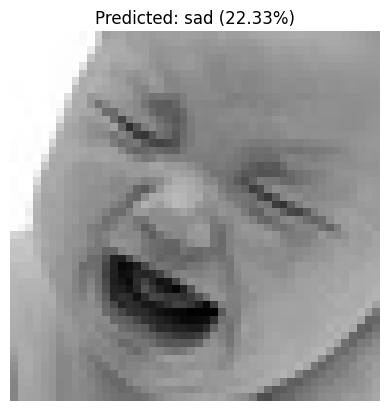

In [ ]:

# Load and preprocess the image
img = image.load_img(img_path, target_size=(48, 48))
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

# Predict
pred = model.predict(img_array)
predicted_class = np.argmax(pred[0])
confidence = np.max(pred[0])

# Class labels (adjust if needed)
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Output
print("Predicted Emotion:", class_names[predicted_class])
print("Confidence: {:.2f}%".format(confidence * 100))

# Show image
plt.imshow(img)
plt.title(f"Predicted: {class_names[predicted_class]} ({confidence*100:.2f}%)")
plt.axis('off')
plt.show()


In [ ]:
# Lets Save the model

In [ ]:
model.save("emotion_model.keras")


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving surprise.mp4 to surprise.mp4


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from google.colab.patches import cv2_imshow

# Load the trained model
model = load_model("emotion_model.keras")

# Emotion labels (order must match training!)
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Load Haar Cascade face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load your uploaded video
video_path = "/content/surprise.mp4"  # Make sure this file exists in /content
cap = cv2.VideoCapture(video_path)

frame_count = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        roi = frame[y:y+h, x:x+w]
        roi = cv2.resize(roi, (48, 48))
        roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
        roi = img_to_array(roi) / 255.0
        roi = np.expand_dims(roi, axis=0)


        pred = model.predict(roi, verbose=0)
        label = class_names[np.argmax(pred)]
        conf = np.max(pred)

        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 255, 0), 2)
        cv2.putText(frame, f"{label} ({conf*100:.1f}%)", (x, y-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,255,0), 2)

    cv2_imshow(frame)
    cv2.waitKey(100)  # 100 ms delay for viewing; adjust if needed

cap.release()
cv2.destroyAllWindows()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

# Load model
model = load_model("emotion_model.keras")
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load video
video_path = "/content/surprise.mp4"
cap = cv2.VideoCapture(video_path)

# Setup video writer to save output
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
out = cv2.VideoWriter('/content/emotion_output.mp4', fourcc, fps, (width, height))

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        roi = frame[y:y+h, x:x+w]
        roi = cv2.resize(roi, (48, 48))
        roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
        roi = img_to_array(roi) / 255.0
        roi = np.expand_dims(roi, axis=0)

        pred = model.predict(roi, verbose=0)
        label = class_names[np.argmax(pred)]
        conf = np.max(pred)

        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 255, 0), 2)
        cv2.putText(frame, f"{label} ({conf*100:.1f}%)", (x, y-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,255,0), 2)

    out.write(frame)

cap.release()
out.release()


In [ ]:
from google.colab import files
files.download('/content/emotion_output.mp4')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>